In [1]:
!git clone https://github.com/ml-ninja/Data_Driven_Science_Python_Demos.git


Cloning into 'Data_Driven_Science_Python_Demos'...
remote: Enumerating objects: 296, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 296 (delta 51), reused 14 (delta 8), pack-reused 180
Receiving objects: 100% (296/296), 219.74 MiB | 35.51 MiB/s, done.
Resolving deltas: 100% (76/76), done.
Checking out files: 100% (121/121), done.
Data_Driven_Science_Python_Demos  sample_data


shape of obs (216, 4000)
shape of S  (216,)


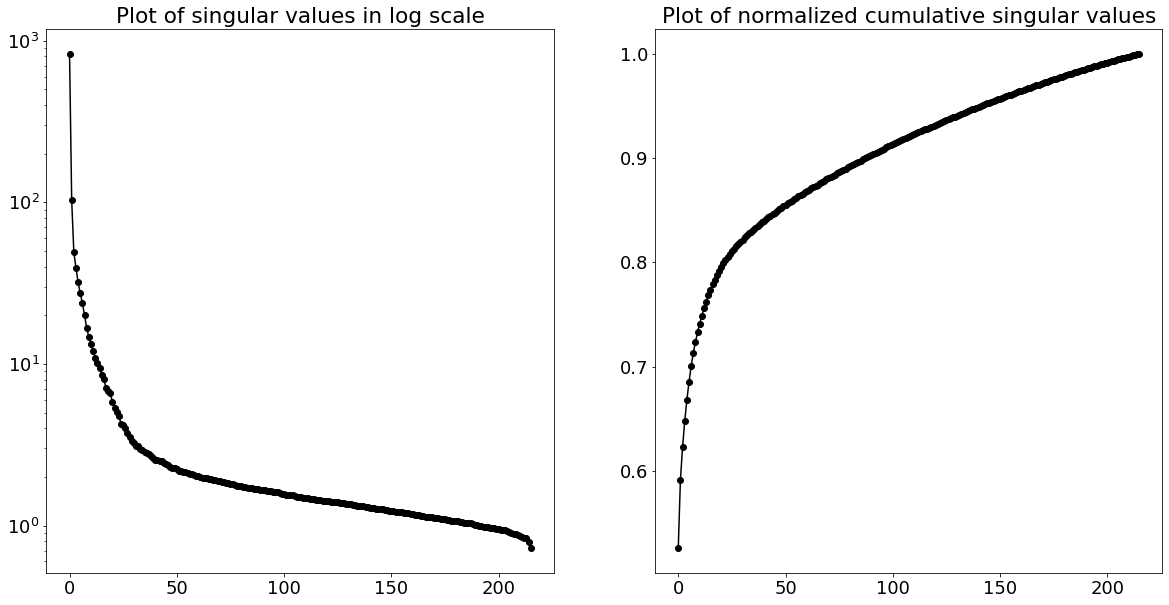

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 18})


obs = np.loadtxt(os.path.join('Data_Driven_Science_Python_Demos','DATA','ovariancancer_obs.csv'),delimiter=',')
print('shape of obs', obs.shape)

f = open(os.path.join('Data_Driven_Science_Python_Demos','DATA','ovariancancer_grp.csv'), "r")
grp = f.read().split("\n")  # grp is a list

U, S, VT = np.linalg.svd(obs,full_matrices=0)
print('shape of S ', S.shape)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121, title='Plot of singular values in log scale')
ax1.semilogy(S,'-o',color='k')

ax2 = fig1.add_subplot(122, title='Plot of normalized cumulative singular values')
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')

plt.show()

shape of VT (216, 4000)
shape of obs (216, 4000)
shape of VT[0,:] (4000,)
shape of obs[0,:] (4000,)
shape of U  (216, 216)


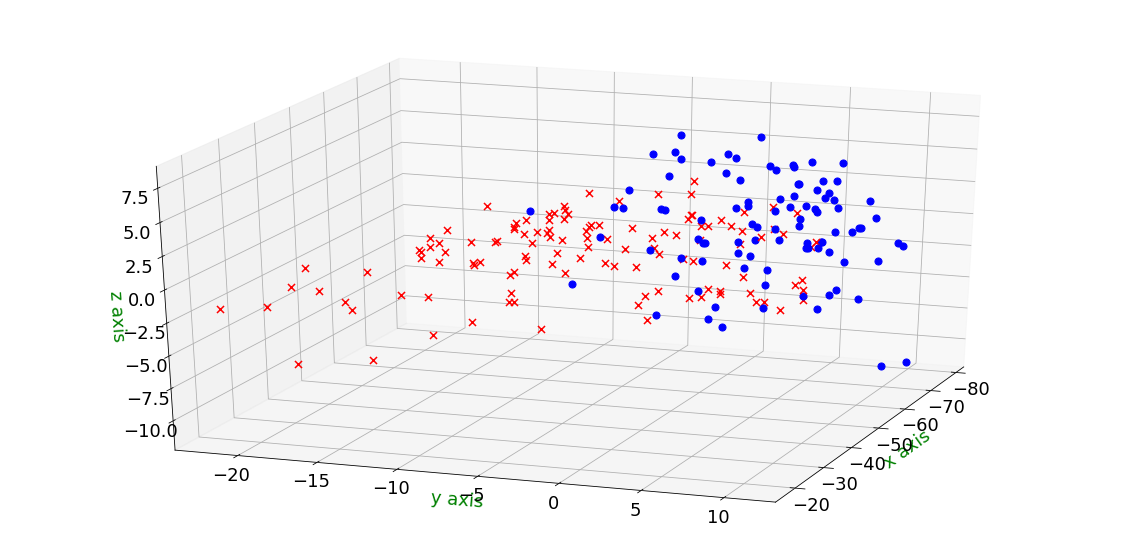

In [28]:

print('shape of VT', VT.shape)
print('shape of obs', obs.shape)
print('shape of VT[0,:]', VT[0,:].shape)
print('shape of obs[0,:]', obs[0,:].shape)
print('shape of U ', U.shape)

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.set_xlabel('x axis', color='g')
ax.set_ylabel('y axis', color='g')
ax.set_zlabel('z axis', color='g')

for j in range(obs.shape[0]):
    x = VT[0,:] @ obs[j,:].T
    y = VT[1,:] @ obs[j,:].T
    z = VT[2,:] @ obs[j,:].T
    
    if grp[j] == 'Cancer':
        ax.scatter(x,y,z,marker='x',color='r',s=50)
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=50)

ax.view_init(25,20)
plt.show()